In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
import sys
sys.path.append(str(Path.cwd() / 'util/'))
from qubit_templates import *
from functions import *
from ChipDesign import *
from phidl import quickplot as qp

In [3]:
config = load_config( f"config/common_purcellfilter.yaml" )

config/common_purcellfilter.yaml


Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


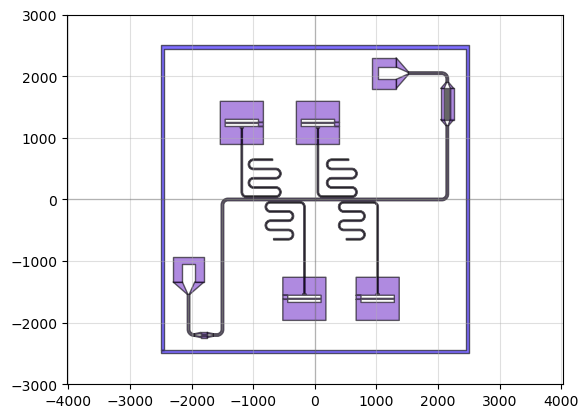

In [4]:
chip, device_list = chipdesign_transmon2D_Purcell( config )
qp( chip )

In [5]:
pprint.pprint(device_list)

[{'device': <qubit_templates.device_FeedLine_PurcellFilter object at 0x11a700950>,
  'name': 'FeedLine'},
 {'device': <qubit_templates.device_Resonator object at 0x118a09f90>,
  'name': 'Qubit1'},
 {'device': <qubit_templates.device_Resonator object at 0x17c775890>,
  'name': 'Qubit2'},
 {'device': <qubit_templates.device_Resonator object at 0x17c743810>,
  'name': 'Qubit3'},
 {'device': <qubit_templates.device_Resonator object at 0x17c768510>,
  'name': 'Qubit4'}]


Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


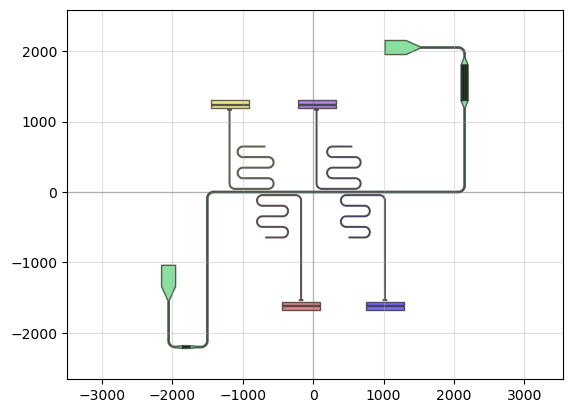

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


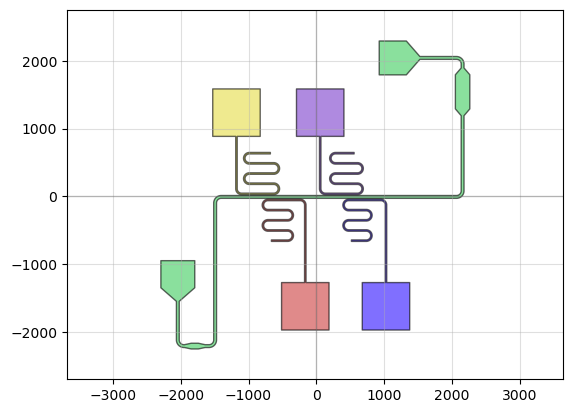

{'FeedLine': {'layer': 0,
              'ports': {'LaunchPad0': {'end': [-2150.0, -940.0],
                                       'gap': 100.0,
                                       'start': [-1950.0, -940.0],
                                       'width': 200.0},
                        'LaunchPad1': {'end': [920.0, 1950.0],
                                       'gap': 100.0,
                                       'start': [920.0, 2150.0],
                                       'width': 200.0}}},
 'Qubit1': {'jj': {'end': [1020.0, -1605.0],
                   'start': [1020.0, -1621.0],
                   'width': 10.0},
            'layer': 1},
 'Qubit2': {'jj': {'end': [-170.0, -1605.0],
                   'start': [-170.0, -1621.0],
                   'width': 10.0},
            'layer': 2},
 'Qubit3': {'jj': {'end': [-1185.0, 1235.0],
                   'start': [-1185.0, 1251.0],
                   'width': 10.0},
            'layer': 3},
 'Qubit4': {'jj': {'end': [49.99999999

In [6]:
phidl_to_metal(
    device_list = device_list, 
    outname = "PurcellFilter"
)

In [7]:
f_pf = calculate_purcellfilter_frequency(
        edge1 = config["PurcellFilter_devices"][0],
        edge2 = config["PurcellFilter_devices"][1],
        length = 7700, # um
        core_width = config["LaunchPad_trace_width"], # um
        gap_width = config["LaunchPad_trace_gap_width"], # um
        height = 525, # um
        material = "silicon"
)
print(f_pf)

eff_len_edge1 333
eff_len_edge2 3577
5083.082625415481
